In [71]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Lambda
from keras.layers import Dropout
from keras.layers import SimpleRNN, LSTM
import matplotlib.pyplot as plt
import random

In [72]:
model = Sequential()

model.add(LSTM(128, input_shape=(None, 1)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Lambda(lambda x:(-1.25+x*2.5)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
_________________________________________________________________
lambda_5 (Lambda)            (None, 1)                 0         
Total para

In [73]:
def sine_gen(batchsize):
    while True:
        seqlen = np.random.randint(5,10)
        x_train, y_train = list(), list()
        for i in range(batchsize):
            theta = random.uniform(0,2*np.pi)
            sines = np.array([np.sin(theta+j*1e-1) for j in range(seqlen)])
            x_train.append(sines.reshape(seqlen,1))
            y_train.append([np.sin(theta+seqlen*1e-1)])
        yield np.array(x_train), np.array(y_train)

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
model.fit_generator(sine_gen(64), steps_per_epoch=200, epochs=20, verbose=1,
                   validation_data=sine_gen(32), validation_steps=1)

Epoch 1/20
200/200 [==============================] - 9s 45ms/step - loss: 0.0614 - val_loss: 0.0066
Epoch 2/20
200/200 [==============================] - 5s 25ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 3/20
200/200 [==============================] - 5s 24ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/20
200/200 [==============================] - 6s 28ms/step - loss: 0.0020 - val_loss: 4.7845e-04
Epoch 5/20
200/200 [==============================] - 6s 28ms/step - loss: 0.0015 - val_loss: 5.2744e-04
Epoch 6/20
200/200 [==============================] - 5s 25ms/step - loss: 0.0013 - val_loss: 2.3001e-04
Epoch 7/20
200/200 [==============================] - 5s 26ms/step - loss: 0.0012 - val_loss: 3.3316e-04
Epoch 8/20
200/200 [==============================] - 5s 24ms/step - loss: 0.0011 - val_loss: 1.9688e-04
Epoch 9/20
200/200 [==============================] - 7s 34ms/step - loss: 0.0010 - val_loss: 1.7275e-04
Epoch 10/20
200/200 [==============================] - 7s 33ms/step

In [76]:
itr = sine_gen(1)
s=next(itr)[0]
s=s[:,:5,:]
print(s)
y = model.predict(s)
print(y)

[[[-0.35142402]
  [-0.25620268]
  [-0.15842145]
  [-0.05905733]
  [ 0.04089688]]]
[[0.1463443]]


In [77]:
np.hstack((s,y.reshape(1,1,1)))
arr = s
for i in range(2000):
    tmp = model.predict(arr[:,-5:,:])
    arr = np.hstack((arr,tmp.reshape(1,1,1)))
    if i%1000==0:
        print(i)

0
1000


In [78]:
arr = arr.reshape((arr.shape[1],))

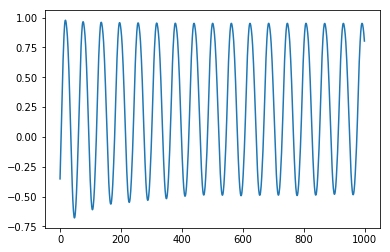

In [79]:
plt.plot(arr[:1000])
plt.show()

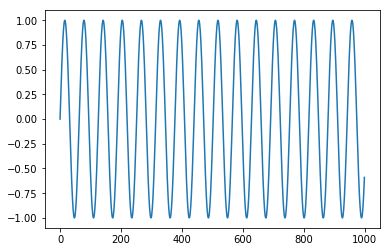

In [80]:
a=np.sin(np.arange(0,1000*1e-1, 1e-1))
plt.plot(a)
plt.show()